In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances


ModuleNotFoundError: No module named 'sklearn'

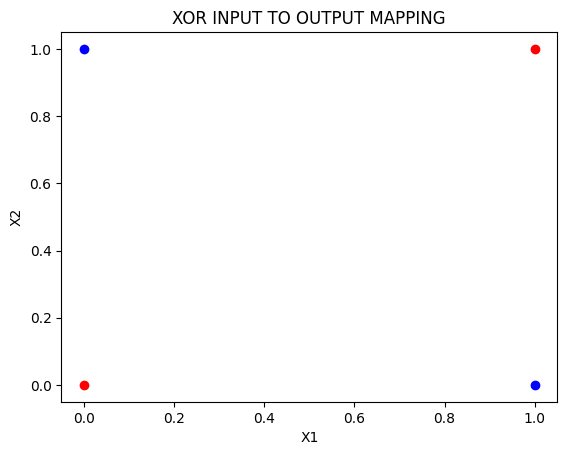

In [3]:
for x1, x2 in [(0,1), (0, 0), (1, 0), (1,1)]:
    plt.plot(x1, x2, marker="o", color="blue" if x1^x2 else "red")
plt.title("XOR INPUT TO OUTPUT MAPPING")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [1]:
class RBFNetwork:
    def __init__(self, n_centers=2, reg_param=0.01):
        self.n_centers = n_centers
        self.reg_param = reg_param
        self.centers = None
        self.sigma = None
        self.w = np.random.randn(n_centers)
    
    def rbf(self, X):
        return np.exp(-euclidean_distances(X, self.centers)**2 / (2 * self.sigma**2))
    
    def fit(self, X, y):
        kmeans = KMeans(n_clusters=self.n_centers, random_state=0).fit(X)
        self.centers = kmeans.cluster_centers_
        self.sigma = np.mean(euclidean_distances(self.centers))
        Phi = self.rbf(X)
        
        I = np.eye(Phi.shape[1])
        self.w = np.linalg.inv(Phi.T @ Phi + self.reg_param * I) @ Phi.T @ y
    
    def predict(self, X):
        Phi = self.rbf(X)
        return Phi @ self.w
    
    def plot_rbf_responses(self, X, y):
        Phi = self.rbf(X)
        for i in Phi:
            plt.plot(i[0], i[1])
        plt.xlabel("RBF(X1)")
        plt.ylabel("RBF(X2)")
        plt.title("RBF Mapping of Inputs to N-Dimensions")
        plt.axhline(0, color='gray', linestyle='--')
        plt.axvline(0, color='gray', linestyle='--')
        plt.grid(True)
        
        # Decision Boundary
        x_min, x_max = Phi[:, 0].min() - 0.1, Phi[:, 0].max() + 0.1
        y_min, y_max = Phi[:, 1].min() - 0.1, Phi[:, 1].max() + 0.1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        
        Z = self.predict(grid).reshape(xx.shape)
        plt.contourf(xx, yy, Z, levels=[-1, 0.5, 2], colors=['blue', 'red'], alpha=0.2)
        plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=1)
        plt.show()

X = np.array([(random.randint(0, 1), random.randint(0,1)) for _ in range(30)])
y = np.array([i^j for i,j in X])

reg_params = [0, 0.01, 0.1, 1]

rbf_net = RBFNetwork()
rbf_net.fit(X, y)
rbf_net.plot_rbf_responses([(0,1), (0, 0), (1, 0), (1,1)], [1, 0, 1, 0])


NameError: name 'np' is not defined

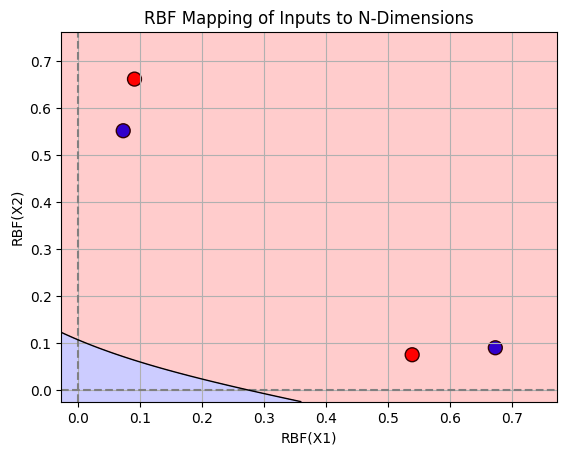

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

class RBFNetwork:
    def __init__(self, n_centers=2, reg_param=0.01):
        self.n_centers = n_centers
        self.reg_param = reg_paramdd
        self.centers = None
        self.sigma = None
        self.w = None
    
    def rbf(self, X):
        return np.exp(-euclidean_distances(X, self.centers)**2 / (2 * self.sigma**2))
    
    def fit(self, X, y):
        kmeans = KMeans(n_clusters=self.n_centers, random_state=0).fit(X)
        self.centers = kmeans.cluster_centers_
        self.sigma = np.mean(euclidean_distances(self.centers))
        Phi = self.rbf(X)
        
        I = np.eye(Phi.shape[1])
        self.w = np.linalg.inv(Phi.T @ Phi + self.reg_param * I) @ Phi.T @ y
    
    def predict(self, X):
        Phi = self.rbf(X)
        print
        return Phi @ self.w
    
    def plot_rbf_responses(self, X, y):
        Phi = self.rbf(X)
        
        # Ensure (1,0) and (0,1) are mapped to the same point
        unique_points, indices = np.unique(Phi, axis=0, return_index=True)
        unique_labels = np.array(y)[indices]
        
        plt.scatter(unique_points[:, 0], unique_points[:, 1], c=unique_labels, cmap='bwr', edgecolors='k', s=100)
        plt.xlabel("RBF(X1)")
        plt.ylabel("RBF(X2)")
        plt.title("RBF Mapping of Inputs to N-Dimensions")
        plt.axhline(0, color='gray', linestyle='--')
        plt.axvline(0, color='gray', linestyle='--')
        plt.grid(True)
        
        # Decision Boundary
        x_min, x_max = Phi[:, 0].min() - 0.1, Phi[:, 0].max() + 0.1
        y_min, y_max = Phi[:, 1].min() - 0.1, Phi[:, 1].max() + 0.1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        
        Z = self.predict(grid).reshape(xx.shape)
        plt.contourf(xx, yy, Z, levels=[-1, 0.5, 2], colors=['blue', 'red'], alpha=0.2)
        plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=1)
        plt.show()

X = np.array([(random.randint(0, 1), random.randint(0,1)) for _ in range(20)])
y = np.array([i^j for i,j in X])

reg_params = [0, 0.01, 0.1, 1]

rbf_net = RBFNetwork()
rbf_net.fit(X, y)
rbf_net.plot_rbf_responses(X, y)
